In [219]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split,KFold,cross_val_score

from sklearn.metrics import accuracy_score

# Grid Search
from sklearn.model_selection import GridSearchCV
# Voting
from sklearn.ensemble import VotingClassifier

In [72]:
data=pd.read_csv('./data/titanic.csv')

In [73]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [76]:
data.isnull().sum()/data.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [77]:
data.groupby(['Pclass','Sex']).Age.mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [78]:
def bar_chart(feature):
    survive = data.query('Survived==1')[feature].value_counts()
    death = data.query('Survived==0')[feature].value_counts()
    temp = pd.DataFrame([survive,death])
    temp.index = ['survive','death']
    temp.plot(kind='bar',stacked=True,figsize=(10,5))

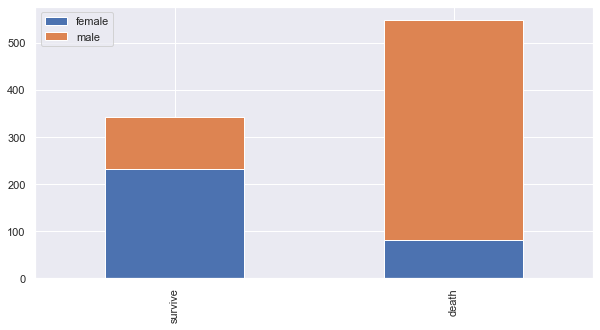

In [79]:
bar_chart('Sex')

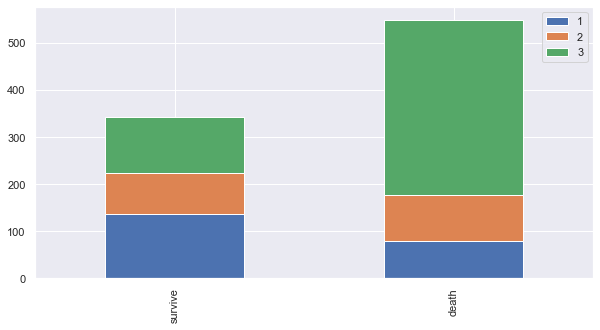

In [80]:
bar_chart('Pclass')

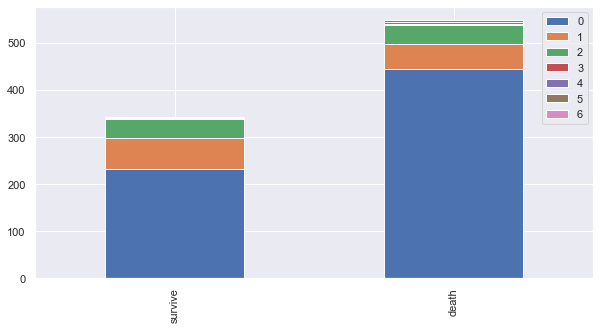

In [81]:
bar_chart('Parch')

In [82]:
data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [83]:
data['Title']=data['Name'].str.extract('([a-zA-Z]+)\.',expand=False)

In [84]:
data.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [85]:
name_dict = {'Mr':0,
            'Miss':1,
            'Mrs':2}

In [86]:
data['Title']=data['Title'].map(name_dict)
data['Title'] = data['Title'].fillna(3)

In [88]:
data.drop(['Name'],axis=1,inplace=True)

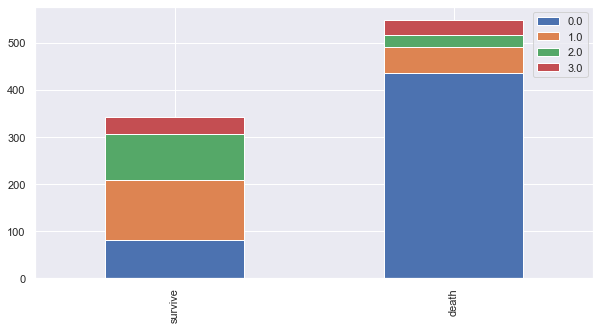

In [90]:
bar_chart('Title')

In [110]:
data['Age'].fillna(data.groupby(['Pclass','Title'])['Age'].transform('median'),inplace=True)

In [117]:
data.loc[data['Age']<=16,'Age']=0
data.loc[(data['Age']>16) & (data['Age']<=26),'Age']=1
data.loc[(data['Age']>26) & (data['Age']<=36),'Age']=2
data.loc[(data['Age']>36) & (data['Age']<=62),'Age']=3
data.loc[(data['Age']>62) ,'Age']=4

In [120]:
data['Embarked'].fillna('S',inplace=True)

<AxesSubplot:ylabel='Density'>

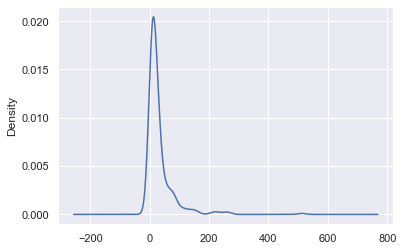

In [124]:
data['Fare'].plot(kind='density')

In [128]:
data['Cabin'] = data['Cabin'].str[0]

In [142]:
data['Cabin']=data.groupby('Pclass', sort=False)['Cabin'].apply(lambda x: x.fillna(x.mode()[0]))

In [144]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,0.0,1,0,A/5 21171,7.2500,F,S,0.0
1,2,1,1,female,3.0,1,0,PC 17599,71.2833,C,C,2.0
2,3,1,3,female,0.0,0,0,STON/O2. 3101282,7.9250,F,S,1.0
3,4,1,1,female,2.0,1,0,113803,53.1000,C,S,2.0
4,5,0,3,male,2.0,0,0,373450,8.0500,F,S,0.0


In [151]:
data.drop(['Ticket'],axis=1,inplace=True)
data.drop(['PassengerId'],axis=1,inplace=True)

In [155]:
data = pd.get_dummies(data)

In [163]:
y = data['Survived']
vals = list(data.columns)
vals.remove('Survived')
X = data[vals]

In [166]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y)

In [223]:
clf1= LogisticRegression()
clf2= DecisionTreeClassifier()
clf3=RandomForestClassifier()
clf4=GradientBoostingClassifier()
clf5= SVC()
clf6 = KNeighborsClassifier(n_neighbors=13)

In [224]:
n_folds= 5
def accuracy_cv(model):
    kf = KFold(n_folds,shuffle=True,random_state=42)
    score= cross_val_score(model,X_train,y_train,scoring='accuracy',cv=kf)
    score= score.mean()
    return score

In [225]:
models = [clf1,clf2,clf3,clf4,clf5,clf6]
for model in models:
    score = accuracy_cv(model)
    print(f'{str(model)} : {score}')

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

LogisticRegression() : 0.8171096774193549
DecisionTreeClassifier() : 0.7801548387096775
RandomForestClassifier() : 0.8009548387096774
GradientBoostingClassifier() : 0.8202451612903227
SVC() : 0.6917806451612905
KNeighborsClassifier(n_neighbors=13) : 0.7528129032258065


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier wa

In [206]:
final_model= GradientBoostingClassifier(n_estimators=100)

In [207]:
final_model = final_model.fit(X_train,y_train)

In [208]:
y_pred = final_model.predict(X_test)

In [209]:
acc = accuracy_score(y_pred,y_test)

In [210]:
print(acc)

0.8134328358208955


In [229]:
sub_model = LogisticRegression()
sub_model = sub_model.fit(X_train,y_train)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [238]:
sub_model2 = KNeighborsClassifier()
sub_model2 = sub_model.fit(X_train,y_train)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [239]:
voting = VotingClassifier([('gc',final_model),('lg',sub_model),('Knn',sub_model2)],voting='hard')

In [240]:
voting.fit(X_train,y_train)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

VotingClassifier(estimators=[('gc', GradientBoostingClassifier()),
                             ('lg', LogisticRegression()),
                             ('Knn', LogisticRegression())])

In [241]:
y_pred=voting.predict(X_test)

In [242]:
accuracy_score(y_pred,y_test)

0.8097014925373134